**Importando bibliotecas, lendo apenas as colunas necessárias e imprimindo apenas cinco linhas com a função .head()**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("/home/mauro/Área de Trabalho/enade/microdados_enade_2011/3.DADOS/MICRODADOS_ENADE_2011.txt", delimiter=';', encoding='iso-8859-1', usecols=['NU_ANO', 'CO_GRUPO', 'TP_SEXO'])
df.sample(5)

,NU_ANO,CO_GRUPO,TP_SEXO
371965,2011,2001,F
159188,2011,5902,M
223785,2011,6307,F
113802,2011,902,F
359658,2011,1501,F


**Distribuição dos alunos por curso no enem em um universo de todos os cursos**

Text(0, 0.5, 'Alunos')

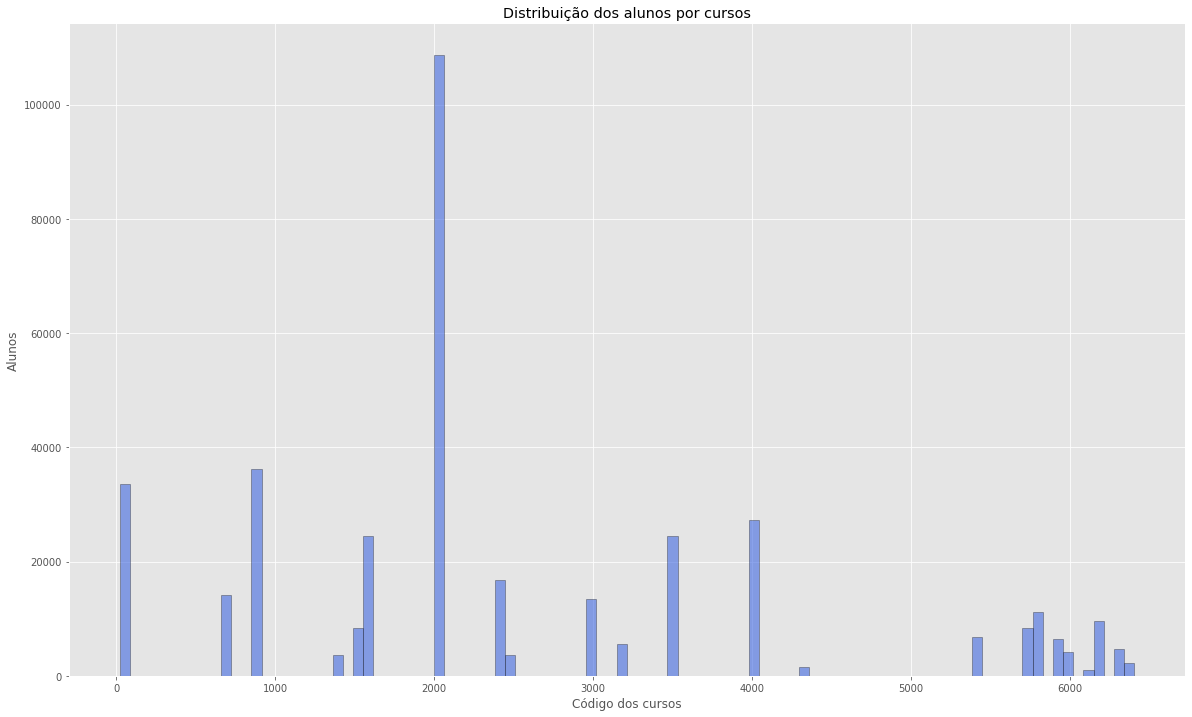

In [2]:
plt.style.use("ggplot")
plt.figure(figsize = (20, 12))
df["CO_GRUPO"].hist(bins = 100, ec = "k", alpha = .6, color = "royalblue")
plt.title("Distribuição dos alunos por cursos")
plt.xlabel("Código dos cursos")
plt.ylabel("Alunos")

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função count para saber a quantidade de alunos nos cursos.**

In [3]:
df = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==4007) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811)]
df.count()

NU_ANO      43075
CO_GRUPO    43075
TP_SEXO     43075
dtype: int64

**Usando a função loc para selecionar a coluna que contém os dados desejados e a função assign para criar uma nova coluna de nome curso.**

In [4]:
df = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==4007) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811)].assign(curso=df.CO_GRUPO) 
df.sample(10)

,NU_ANO,CO_GRUPO,TP_SEXO,curso
199399,2011,4006,M,4006
174376,2011,5809,M,5809
334170,2011,4004,M,4004
176024,2011,4004,M,4004
80727,2011,4004,M,4004
202769,2011,4006,M,4006
142111,2011,4006,M,4006
368723,2011,4004,M,4004
187986,2011,72,F,72
342527,2011,79,M,79


**Criando a função define_nome para converter o código do curso em nome do curso.**

In [5]:
def define_nome(num):
    if num == 72:
        return 'TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SISTEMAS'
    elif num == 79:
        return 'TECNOLOGIA EM REDES DE COMPUTADORES'
    elif num == 4004:
        return 'COMPUTAÇÃO (BACHARELADO)'
    elif num == 4005:
        return 'COMPUTAÇÃO (LICENCIATURA)'
    elif num == 4006:
        return 'COMPUTAÇÃO (SISTEMAS DE INFORMAÇÃO)'
    elif num == 4007:
        return 'COMPUTAÇÃO (BACHARELADO)'
    elif num == 4005:
        return 'COMPUTAÇÃO (ENGENHARIA DE COMPUTAÇÃO)'   
    elif num == 5809:
        return 'ENGENHARIA DA COMPUTAÇÃO'
    elif num == 5811:
        return 'ENGENHARIA DE REDES DE COMUNICAÇÃO' 
    
df['curso'] = df['CO_GRUPO'].map(define_nome)
df.head()

,NU_ANO,CO_GRUPO,TP_SEXO,curso
942,2011,4004,M,COMPUTAÇÃO (BACHARELADO)
943,2011,4004,M,COMPUTAÇÃO (BACHARELADO)
944,2011,4004,M,COMPUTAÇÃO (BACHARELADO)
945,2011,4004,M,COMPUTAÇÃO (BACHARELADO)
946,2011,4004,M,COMPUTAÇÃO (BACHARELADO)


**Imprimindo o número de alunos por curso da área de TI, a legenda dos códigos dos cursos está no rodapé.**

In [6]:
dfTotal = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==4007) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811)].assign(curso=df.CO_GRUPO) 
dfTotal['CO_GRUPO'].value_counts()

4006    12604
4004    11804
72      10750
79       4736
4007     2012
4005      833
5809      296
5811       40
Name: CO_GRUPO, dtype: int64

**Contando o número total de alunos por gênero de sexo na área de TI.<br> São 36.542 alunos do sexo masculino, 6.532 do sexo feminino e 1 com gênero não informado.**

In [7]:
dfAlunos = df.loc[(df['CO_GRUPO']==72) | (df['CO_GRUPO']==79) | (df['CO_GRUPO']==4004) | (df['CO_GRUPO']==4005) | (df['CO_GRUPO']==4006) | (df['CO_GRUPO']==4007) | (df['CO_GRUPO']==5809) | (df['CO_GRUPO']==5811) & df['TP_SEXO']==1]
dfAlunos['TP_SEXO'].value_counts()

M    36542
F     6532
N        1
Name: TP_SEXO, dtype: int64

**Gráfico pizza e barras com os gêneros informados, esse ano teve a inclusão da possibilidade de não informar seu gênero sexual.**

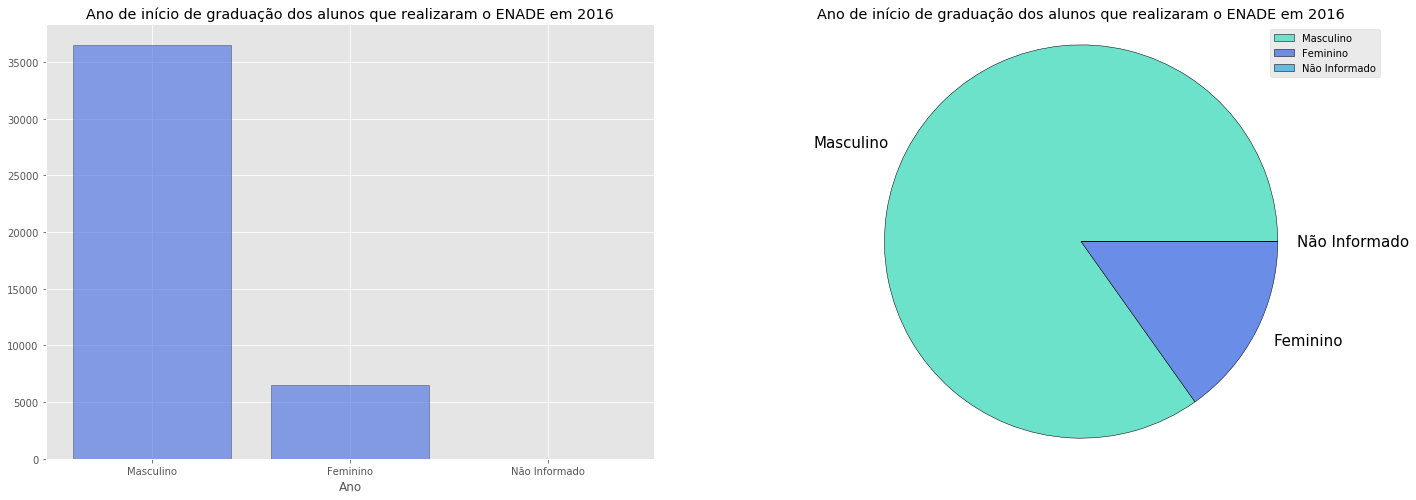

In [8]:

sexo = ['Masculino', 'Feminino', 'Não Informado']
quant = [36542, 6532, 1]
plt.figure(figsize = (24, 8))
plt.subplot(1, 2, 1)
plt.bar(sexo, quant, ec = "k", alpha = .6, color = "royalblue")
plt.xlabel("Ano")
plt.title("Ano de início de graduação dos alunos que realizaram o ENADE em 2016")
plt.subplot(1, 2, 2)
plt.pie(quant, 
        labels = list(sexo),  
        colors = ["#6ce2cb", "#6a8ee8", "#66bbe2"],
        labeldistance = 1.1,
        explode = [0, 0, 0],
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 15}, 
        )
plt.axis("equal")
plt.title("Ano de início de graduação dos alunos que realizaram o ENADE em 2016")
plt.legend(loc=0)

# Legendas:
### Coluna sexo
**F** : Feminino<br>
**M** : Masculino<br>
**N** : Não Informado
### Coluna Curso

**72 -** TECNOLOGIA EM ANALISE E DESENVOLVIMENTO DE SISTEMAS<br>
**79 -** TECNOLOGIA EM REDES DE COMPUTADORES<br>
**4004 -** COMPUTAÇÃO (BACHARELADO)<br>
**4005 -** COMPUTAÇÃO (LICENCIATURA)<br>
**4006 -** COMPUTAÇÃO (SISTEMAS DE INFORMAÇÃO)<br>
**4007 -** COMPUTAÇÃO (ENGENHARIA DE COMPUTAÇÃO) <br>
**5809 -** ENGENHARIA DA COMPUTAÇÃO<br>
**5811 -** ENGENHARIA DE REDES DE COMUNICAÇÃO

## Observação 
#### O enade mudou o formato de seus dados, como mudanças eles trouxeram:
**Formato do arquivo:** Mudou de csv para txt<br>
**Nome das colunas:** Agora as colunas são nomeadas em CAIXA ALTA<br>
**Sexo dos alunos:** Mudou-se do formato numérico (1, 2) para o formato alfabético (M, F, N). Foi incluído a possibilidade de não informar seu gênero sexual.